## Read data Reviews

In [1]:
#Read all the json files paths under the folder dummy_data/amazon_reviews, glob finds files in a folder
from glob2 import glob
jsonFiles = glob('../dummy_data/amazon_reviews/**/*.json.gz')
print(jsonFiles)

['../dummy_data/amazon_reviews\\partition_1\\part-00000-tid-9136122565017344171-3f98196e-e0c5-4bb5-90cc-d523170ef713-86080-1-c000.json.gz', '../dummy_data/amazon_reviews\\partition_10\\part-00000-tid-698064602200227711-29b88890-b701-4ddb-82cf-535e4b44c9cf-89301-1-c000.json.gz', '../dummy_data/amazon_reviews\\partition_10\\part-00001-tid-698064602200227711-29b88890-b701-4ddb-82cf-535e4b44c9cf-89302-1-c000.json.gz', '../dummy_data/amazon_reviews\\partition_2\\part-00000-tid-3563586395744623593-6cf89272-204c-4842-8213-a9fededc6c3e-86436-1-c000.json.gz', '../dummy_data/amazon_reviews\\partition_3\\part-00000-tid-5168070981020497771-23145081-026a-40e2-8306-c44c8798909e-86792-1-c000.json.gz', '../dummy_data/amazon_reviews\\partition_4\\part-00000-tid-1278760204057610384-8cb8e0d5-db5a-4f12-ba20-a126f91db65a-87148-1-c000.json.gz', '../dummy_data/amazon_reviews\\partition_5\\part-00000-tid-3251335059081884154-498bd1d7-6019-40be-95b3-784cf828ee60-87504-1-c000.json.gz', '../dummy_data/amazon_revi

In [2]:
#Create a single dataframe from all the json files
import pandas as pd
dfList = []
for jsonFile in jsonFiles:
    df = pd.read_json(jsonFile, lines=True,compression='gzip')
    dfList.append(df)
    
df_reviews = pd.concat(dfList, axis=0)

## Exploratory Data Analysis

In [ ]:
#Meaning of the columns:

## amazon_reviews:

""" 
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product 
"""

## amazon_metadata:

"""
asin - ID of the product, e.g. 0000031852
title - name of the product
feature - bullet-point format features of the product
description - description of the product
price - price in US dollars (at time of crawl)
imageURL - url of the product image
imageURL - url of the high resolution product image
related - related products (also bought, also viewed, bought together, buy after viewing)
salesRank - sales rank information
brand - brand name
categories - list of categories the product belongs to
tech1 - the first technical detail table of the product
tech2 - the second technical detail table of the product
similar - similar product table
"""

In [10]:
df_reviews.shape

(111866, 11)

In [11]:
df_reviews.head()

,asin,overall,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote,image
0,B00LQM3O36,1,Very disappointed. Was ordered as a gift for ...,A2YAZXQWIKO8I9,Rebecca Strozier,"{""Size:"":"" One Size"",""Color:"":"" Elsa Dress""}",Very disappointed. Was ordered as a gift for m...,1411948800,false,NaN,NaN
1,0465036376,4,Jaspin should be commended for telling the sto...,A1GSEIT3BP2RLO,Dr. Toby Ziglar,"{""Format:"":"" Hardcover""}",Uncovering Hidden Treasures,1176163200,false,17.0,NaN
2,B00LQM3O36,3,Disappointed with the quality.,A3L4FSHH3BURY6,Carole P.,"{""Size:"":"" One Size"",""Color:"":"" Elsa Dress""}",Three Stars,1411948800,true,NaN,NaN
3,0465032982,5,"Excellent book, a must have additon to any cou...",A17D757Q0VL4SF,Sunbunny064,"{""Format:"":"" Kindle Edition""}",Excellent,1364688000,true,NaN,NaN
4,B00LQM3O36,3,Disappointed with the quality.,A3L4FSHH3BURY6,Carole P.,"{""Size:"":"" One Size"",""Color:"":"" Anna Dress""}",Three Stars,1411948800,true,NaN,NaN


In [26]:
#Check the number of unique values in each column
df_reviews.nunique(axis=0)

asin                4421
overall                5
reviewText        100433
reviewerID         91614
reviewerName       69822
summary            71093
unixReviewTime      6043
verified               2
style               4248
vote                 174
image                582
dtype: int64

In [27]:
#Check for number of missing values in columns
df_reviews.isna().sum()

asin                   0
overall                0
reviewText            52
reviewerID             0
reviewerName           0
summary               22
unixReviewTime         0
verified               0
style              49217
vote               88369
image             111252
dtype: int64

In [28]:
df_reviews[["overall","vote"]].describe()

,overall,vote
count,111866.000000,23497.000000
mean,4.196816,7.710601
std,1.224286,17.250685
min,1.000000,2.000000
25%,4.000000,2.000000
50%,5.000000,4.000000
75%,5.000000,7.000000
max,5.000000,646.000000


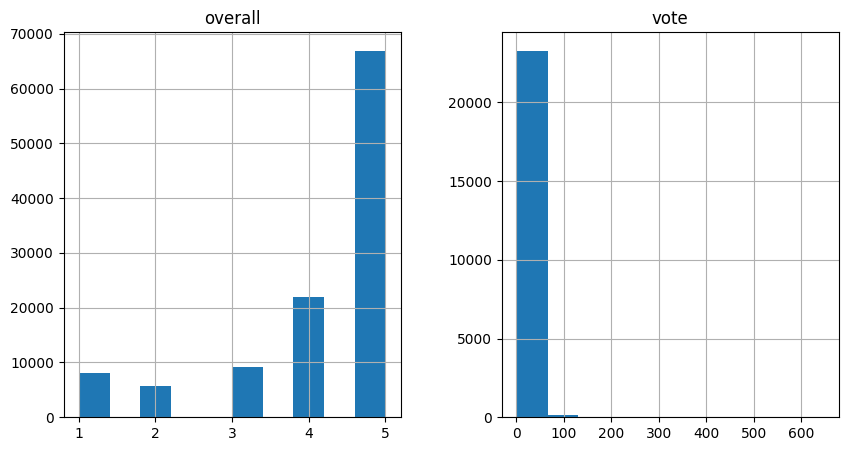

In [29]:
#Plot the histogram of the overall ratings and votes
df_reviews_hist = df_reviews[["overall","vote"]].hist(bins=10,figsize=(10,5))

In [5]:
# Sample of reviews
for i in range(10):
    print(df_reviews["reviewText"].iloc[i])
    print("")

Very disappointed.  Was ordered as a gift for my daughter.  She was thrilled for about an hour then her delight turned to sobbing!  I had already sewed all the snaps back on the dress (yes, in that first hour) and then low and behold the sleeve ripped.  No kidding, less than an hour of play and she can't play with it anymore.  Do NOT purchase!!!!

Jaspin should be commended for telling the stories of these towns, even when the information concerning these incidents is scant.  Buried in the Bitter Waters serves as a reminder to its readers that racial cleansing in America took place throughout the country, not just the Deep South.  It also reminds us that much of the history of our country has yet to be told.  Selma, Birmingham, Memphis, and Montgomery are familiar names in the history of race in America.  Jaspin shines the light on towns like Corbin and Commanche, not to disparage them but to remind us that the racial clensing in America was widespread.

Disappointed with the quality.


In [15]:
# Show a sample of reviews of a single product

product="0465032982"

product_reviews=df_reviews[df_reviews["asin"]==product]

for i in range(len(product_reviews)):
    print(product_reviews["reviewText"].iloc[i])
    print("")


Excellent book, a must have additon to any counseling student's library. The book is set up in an easy to follow format, and the authors message is easy to understand. I have the kindle version and I love it.

This book is well written and is the guru of the Group psychotherapy. You will sure get a lot of infomation from this.

Anyone wanting to open up their mind in Psychotherapy this is the book that will do just that for you.

We used this textbook in my group therapy class and it is fabulous! Yalom is a great writer with so many gems to share and this book is full of gems. I would suggest it to anyone.

It's Yalom!  Of course it was an awesome book and who in a counseling related field hasn't needed to read his work!

Bought this book for class and was impressed with the relatively cheap price for such a large volume. Well, after reading a few chapters is has become apparent that the price is indicative of the quality as it has completely fallen apart (the binding come undone almos

In [10]:
product_reviews

,asin,overall,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote,image


In [20]:

# Group by product and calculate the mean and count of the overall ratings
df_scores = df_reviews.groupby('asin')['overall'].agg(['mean','count'])
df_scores

,mean,count
asin,,
B00002NB7E,5.000000,4
B00004YMG0,5.000000,1
B000050AUM,4.000000,1
B000052Y9J,4.500000,8
B00005Q8LY,4.231076,251
...,...,...
B00EIB2SM0,1.666667,3
B00EICO25U,1.000000,1
B00EID8OVC,4.666667,3


In [31]:
# Group by reviewer and calculate the mean and count of the overall ratings
df_reviews.groupby('reviewerID')['overall'].agg(['mean','count'])

,mean,count
reviewerID,,
A0155152VFGDKFFMJ4Y7,5.0,1
A0198067UBJPDLCUWNFG,5.0,1
A0220159ZRNBTRKLG08H,5.0,1
A0328927TA7ECTIKNP3G,5.0,1
A0362231G0D49Y5H52ES,5.0,2
...,...,...
AZZMZFFA8LQQ9,5.0,1
AZZONWXSDIU4H,4.0,1
AZZS2HDW5UKCX,4.0,1


### Count of words and characters for reviewText and summary

In [43]:
# Get reviews text character count
reviewsText_count=df_reviews['reviewText'].str.len()
reviewsText_count

0        1126.0
1         528.0
2         190.0
3          28.0
4         507.0
          ...  
55928     151.0
55929     334.0
55930      29.0
55931     117.0
55932     326.0
Name: reviewText, Length: 111866, dtype: float64

In [49]:
reviewsText_count.describe()

count    111814.000000
mean        470.961355
std         791.536272
min           1.000000
25%          69.000000
50%         186.000000
75%         527.000000
max       28773.000000
Name: reviewText, dtype: float64

<Axes: >

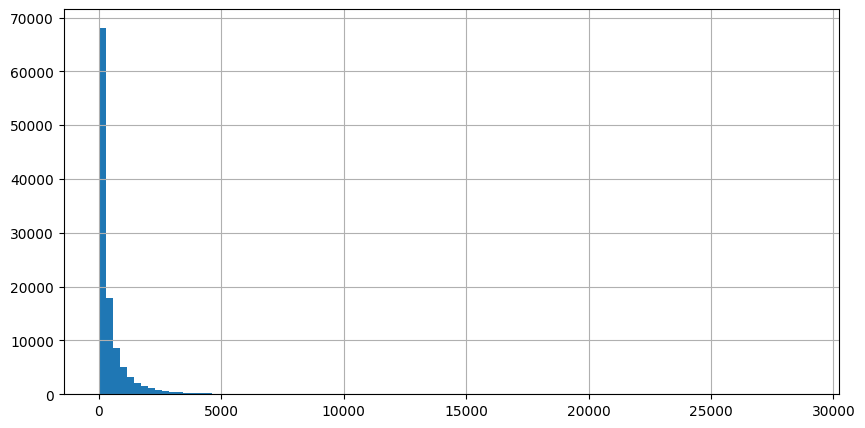

In [45]:
#Histogram of the reviews text character count
reviewsText_count.hist(bins=100,figsize=(10,5))

In [51]:
#Reviews text word count
reviewsText_word_count=df_reviews['reviewText'].str.split().str.len()
reviewsText_word_count

0        210.0
1         91.0
2         35.0
3          5.0
4         97.0
         ...  
55928     24.0
55929     57.0
55930      5.0
55931     20.0
55932     56.0
Name: reviewText, Length: 111866, dtype: float64

In [53]:
reviewsText_word_count.describe()

count    111814.000000
mean         86.860939
std         142.632248
min           1.000000
25%          13.000000
50%          35.000000
75%          99.000000
max        4960.000000
Name: reviewText, dtype: float64

<Axes: >

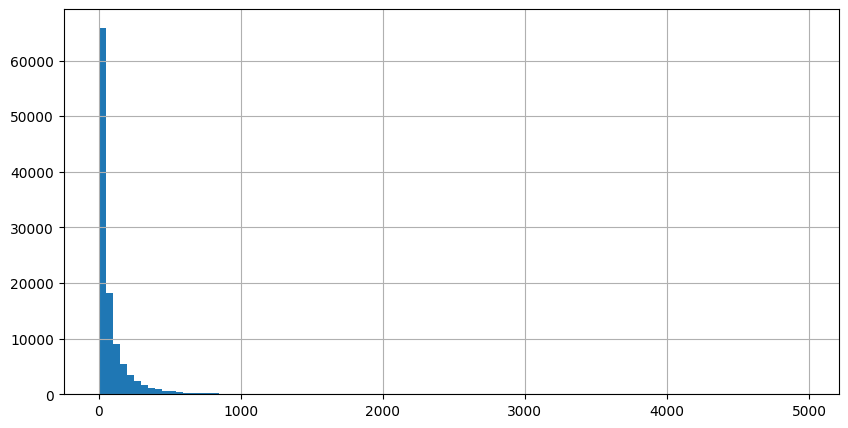

In [52]:
#Histogram of the reviews text word count
reviewsText_word_count.hist(bins=100,figsize=(10,5))

In [46]:
# Get reviews summary character count
summary_count=df_reviews['summary'].str.len()

In [48]:
summary_count.describe()

count    111844.000000
mean         22.882122
std          16.493535
min           1.000000
25%          10.000000
50%          18.000000
75%          31.000000
max         171.000000
Name: summary, dtype: float64

<Axes: >

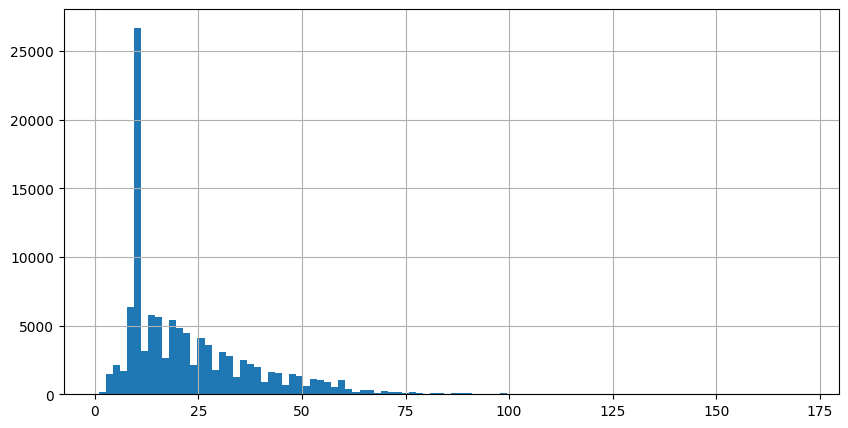

In [47]:

#Histogram of the reviews summary character count
summary_count.hist(bins=100,figsize=(10,5))

In [55]:
#Get reviews summary word count
summary_word_count=df_reviews['summary'].str.split().str.len()
summary_word_count

0        7.0
1        8.0
2        8.0
3        2.0
4        3.0
        ... 
55928    2.0
55929    4.0
55930    2.0
55931    1.0
55932    6.0
Name: summary, Length: 111866, dtype: float64

In [56]:
summary_word_count.describe()

count    111844.000000
mean          4.242972
std           3.170182
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          31.000000
Name: summary, dtype: float64

<Axes: >

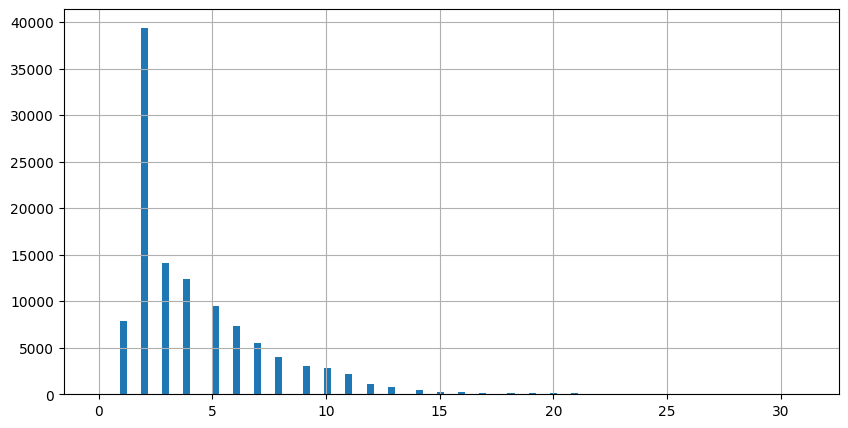

In [57]:
#Histogram of the reviews summary word count
summary_word_count.hist(bins=100,figsize=(10,5))

### Reviews with verified purchases

In [13]:
#Select only reviews with verified purchases
df_reviews_verified = df_reviews[df_reviews['verified']=="true"]
df_reviews_verified.shape

(68204, 11)

In [14]:
#Percentage of verified purchases
df_reviews_verified.shape[0]/df_reviews.shape[0]

0.6096937407255109

In [15]:
#non duplicate reviews
bool_series = df_reviews.duplicated(keep=False)
df_reviews[bool_series]

,asin,overall,reviewText,reviewerID,reviewerName,summary,unixReviewTime,verified,style,vote,image
5668,B00005R5PZ,5,This game is one game you can not live without...,A1OLXS66HBXQJF,Ester Roi,X-l-ent game!,1012003200,false,NaN,NaN,NaN
5670,B00005R5PZ,5,This game is one game you can not live without...,A1OLXS66HBXQJF,Ester Roi,X-l-ent game!,1012003200,false,NaN,NaN,NaN
6990,B00005RCR2,5,This game is so cool to play it and I think yo...,A3M59LLGODU57Y,Amazon Customer,A cool ERBS man.,1006646400,false,NaN,NaN,NaN
6992,B00005RCR2,5,This game is so cool to play it and I think yo...,A3M59LLGODU57Y,Amazon Customer,A cool ERBS man.,1006646400,false,NaN,NaN,NaN
20070,B00005V6B4,5,First Lets get fighting games striaght. Super ...,A1J3SRE2KXKBQZ,Sealja Durkee,Great Improvement!,1025049600,true,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39733,B000088KH3,5,The Xbox version is awesome. The controls are ...,AW434X0AL66PQ,dave,I was unsure at first,1053820800,false,"{""Edition:"":"" Standard"",""Platform:"":"" Xbox""}",NaN,NaN
41295,B000089G5U,1,This game when it first came out was simply gr...,A21EMNUS1B2QV2,robin sutton,if it aint broke don't fix it,1045008000,false,NaN,NaN,NaN
41297,B000089G5U,1,This game when it first came out was simply gr...,A21EMNUS1B2QV2,robin sutton,if it aint broke don't fix it,1045008000,false,NaN,NaN,NaN
54735,B00008XL0E,5,"I didn't think this game would be that fun, bu...",A237K2BYSRY05P,Mikel,Fun game all around!,1057449600,true,NaN,NaN,NaN
